In [7]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style 
sns.set(style="whitegrid")

In [9]:
file_path = 'data_files/Sample - Superstore.csv'

# Load the dataset
df = pd.read_csv(file_path, encoding='ISO-8859-1')

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Catego

In [11]:
#  summary of the dataframe
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null  

In [13]:
# Check for missing values in each column
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [15]:
# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [19]:
# Convert 'Order Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')


In [21]:
# We can drop the Postal Code column as it's not needed for this high-level analysis
df.drop('Postal Code', axis=1, inplace=True)

print("\n'Order Date' converted to datetime format.")


'Order Date' converted to datetime format.


In [25]:
# Set 'Order Date' as the index for time-series analysis
df_time = df.set_index('Order Date')

# Resample data by month and calculate sum of Sales and Profit
monthly_sales_profit = df_time[['Sales', 'Profit']].resample('ME').sum()

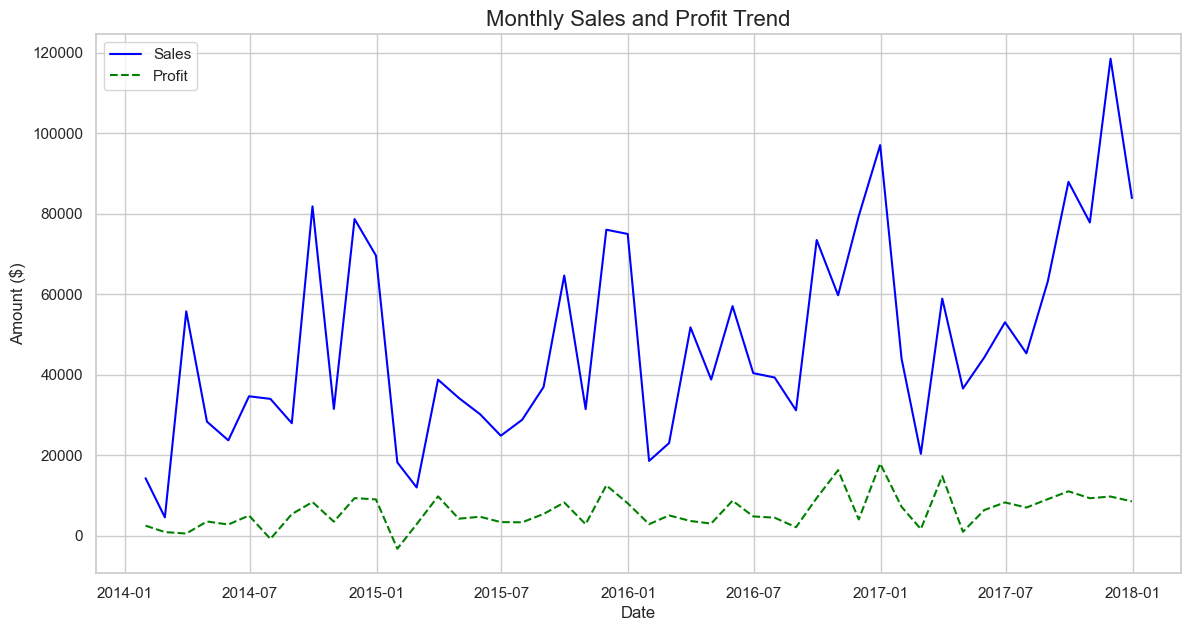

In [27]:
# Plotting the trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales_profit.index, monthly_sales_profit['Sales'], label='Sales', color='blue')
plt.plot(monthly_sales_profit.index, monthly_sales_profit['Profit'], label='Profit', color='green', linestyle='--')
plt.title('Monthly Sales and Profit Trend', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.legend()
plt.show()

In [29]:
# Group data by Category and Sub-Category to analyze profitability
category_profit = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)

print("Sales and Profit by Product Category & Sub-Category:")
display(category_profit)



Sales and Profit by Product Category & Sub-Category:


Sales      Profit
Category        Sub-Category                         
Technology      Copiers       149528.0300  55617.8249
                Phones        330007.0540  44515.7306
                Accessories   167380.3180  41936.6357
Office Supplies Paper          78479.2060  34053.5693
                Binders       203412.7330  30221.7633
Furniture       Chairs        328449.1030  26590.1663
Office Supplies Storage       223843.6080  21278.8264
                Appliances    107532.1610  18138.0054
Furniture       Furnishings    91705.1640  13059.1436
Office Supplies Envelopes      16476.4020   6964.1767
                Art            27118.7920   6527.7870
                Labels         12486.3120   5546.2540
Technology      Machines      189238.6310   3384.7569
Office Supplies Fasteners       3024.2800    949.5182
                Supplies       46673.5380  -1189.0995
Furniture       Bookcases     114879.9963  -3472.5560
                Tables        206965.5320 -17725.4811

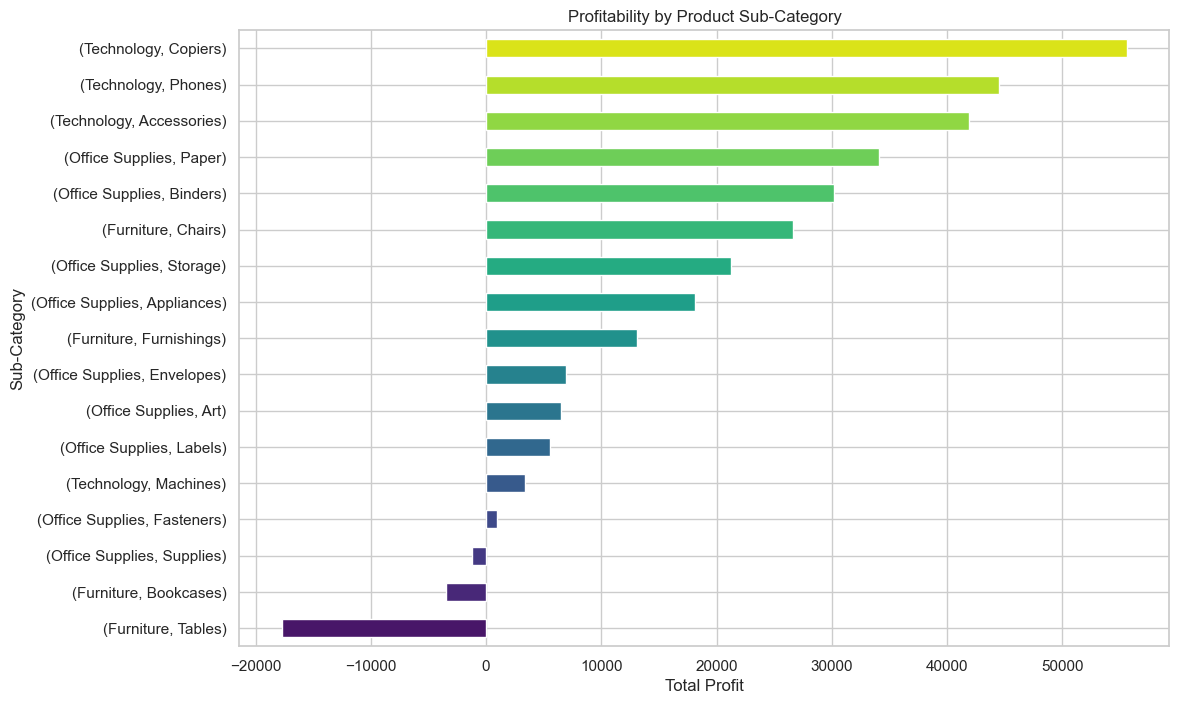

In [31]:
# Visualize the profitability of Sub-Categories
plt.figure(figsize=(12, 8))
category_profit['Profit'].sort_values().plot(kind='barh', color=sns.color_palette("viridis", 17))
plt.title('Profitability by Product Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.show()

In [33]:
# Analyze sales and profit by customer segment
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)

print("\nSales and Profit by Customer Segment:")
display(segment_analysis)



Sales and Profit by Customer Segment:


,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


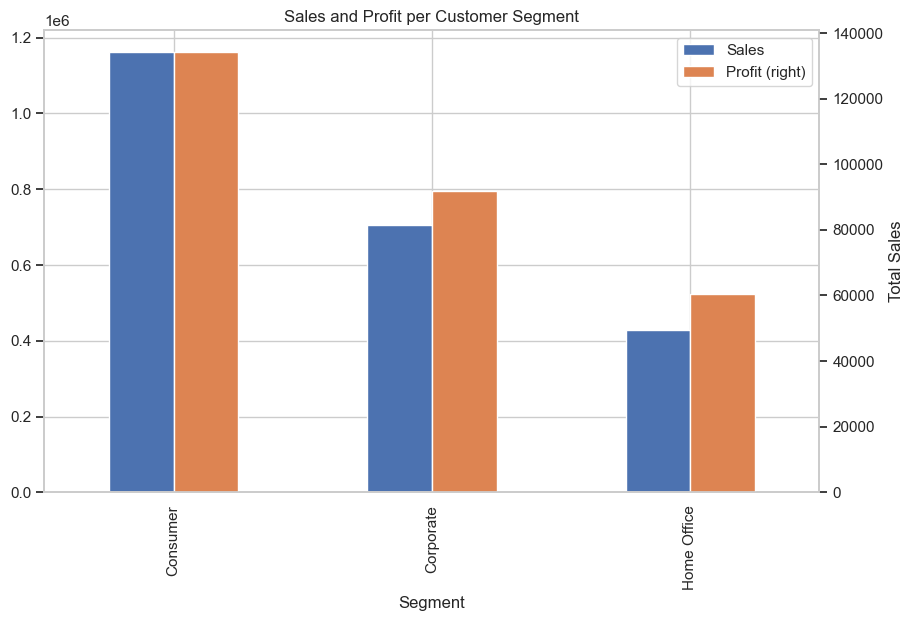

In [35]:

# Plotting the analysis
segment_analysis.plot(kind='bar', figsize=(10, 6), secondary_y='Profit')
plt.title('Sales and Profit per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

In [37]:
# Analyze sales and profit by region
region_analysis = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

print("\nSales and Profit by Region:")
display(region_analysis)




Sales and Profit by Region:


,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


C:\Users\New\AppData\Local\Temp\ipykernel_25452\17049496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_analysis.index, y=region_analysis['Sales'], ax=ax[0], palette='Blues_d')
C:\Users\New\AppData\Local\Temp\ipykernel_25452\17049496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_analysis.index, y=region_analysis['Profit'], ax=ax[1], palette='Greens_d')


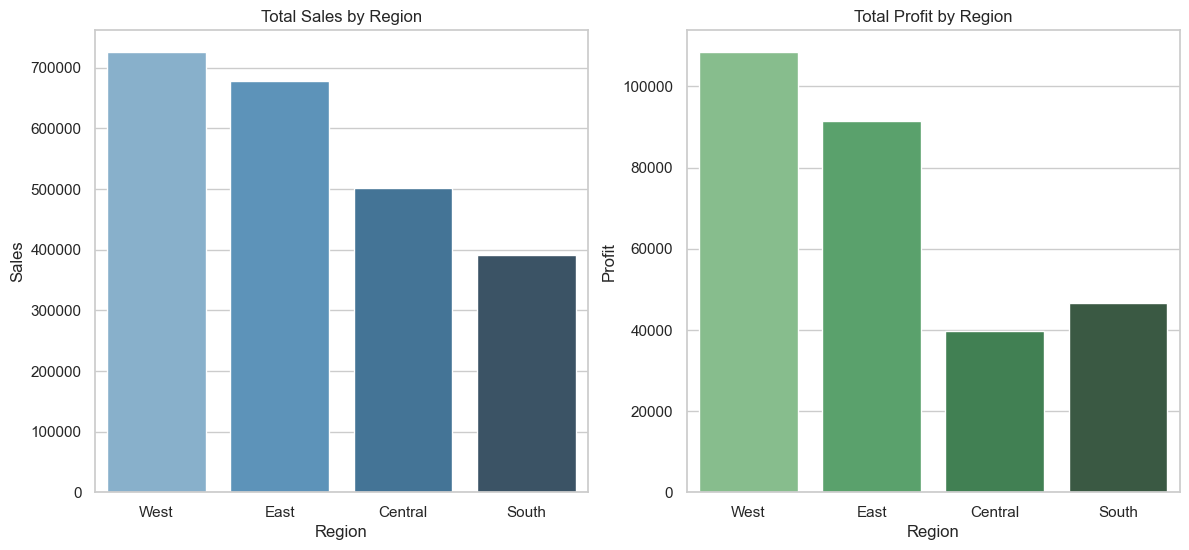

In [39]:
# Plotting the analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=region_analysis.index, y=region_analysis['Sales'], ax=ax[0], palette='Blues_d')
ax[0].set_title('Total Sales by Region')

sns.barplot(x=region_analysis.index, y=region_analysis['Profit'], ax=ax[1], palette='Greens_d')
ax[1].set_title('Total Profit by Region')

plt.show()

**The analysis of the Superstore dataset revealed that while overall sales were positive, profitability was a major issue. I found that the Technology category was the primary driver of profit, but the Furniture category, particularly Tables and Bookcases, consistently lost money. This result showed that high sales don't always equal high profit and that the business needed to address these specific loss-making products.**